<a href="https://colab.research.google.com/github/farshadabdulazeez/deep-learning-basics/blob/main/batchGD_vs_stochasticGD_vs_miniBatchGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [13]:
import pandas as pd

import kagglehub

path = kagglehub.dataset_download("rakeshrau/social-network-ads")
print("Dataset downloaded to:", path)

100%|██████████| 3.27k/3.27k [00:00<00:00, 1.59MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/rakeshrau/social-network-ads/versions/1


In [18]:
# Define the dataset file path
dataset_file = f"{path}/Social_Network_Ads.csv"

# Load the dataset
df = pd.read_csv(dataset_file)

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
# Select relevant columns for features and target
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [20]:
# Split data into features (X) and target (y)
X = df.iloc[:, 0:2]  # Features: Age and EstimatedSalary
y = df.iloc[:, -1]   # Target: Purchased

In [21]:
# Scale the features for better convergence during training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Function to create a neural network model
def create_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=2))  # Hidden Layer 1
    model.add(Dense(10, activation='relu'))  # Hidden Layer 2
    model.add(Dense(1, activation='sigmoid'))  # Output Layer
    return model

In [23]:
# Function to plot training loss
def plot_loss(history, label):
    plt.plot(history.history['loss'], label=label)


Training with Batch Gradient Descent (BGD):
Time taken for BGD: 34.72 seconds


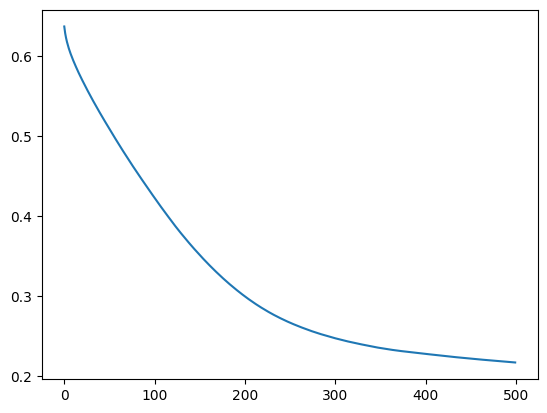

In [25]:
# ==================== Batch Gradient Descent ====================
print("\nTraining with Batch Gradient Descent (BGD):")
model_bgd = create_model()  # Create the model
model_bgd.compile(loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model

start_bgd = time.time()
# Train using BGD: Entire dataset as a single batch
history_bgd = model_bgd.fit(X_scaled, y, epochs=500, batch_size=len(X_scaled), validation_split=0.2, verbose=0)
time_bgd = time.time() - start_bgd  # Record time taken

print(f"Time taken for BGD: {time_bgd:.2f} seconds")
plot_loss(history_bgd, label='BGD')  # Plot loss curve for BGD


Training with Stochastic Gradient Descent (SGD):
Time taken for SGD: 346.44 seconds


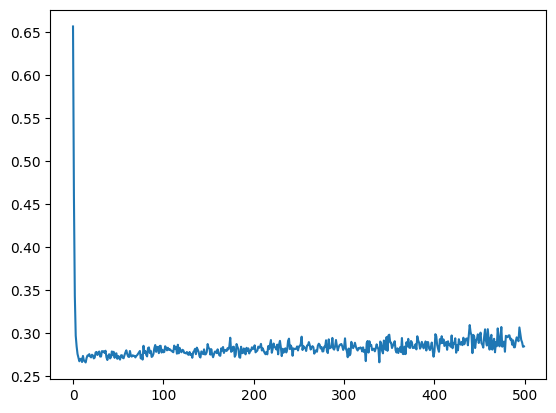

In [26]:
# ==================== Stochastic Gradient Descent ====================
print("\nTraining with Stochastic Gradient Descent (SGD):")
model_sgd = create_model()  # Create the model
model_sgd.compile(loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model

start_sgd = time.time()
# Train using SGD: One sample per batch
history_sgd = model_sgd.fit(X_scaled, y, epochs=500, batch_size=1, validation_split=0.2, verbose=0)
time_sgd = time.time() - start_sgd  # Record time taken

print(f"Time taken for SGD: {time_sgd:.2f} seconds")
plot_loss(history_sgd, label='SGD')  # Plot loss curve for SGD


Training with Mini-Batch Gradient Descent (MBGD):
Time taken for MBGD: 57.38 seconds


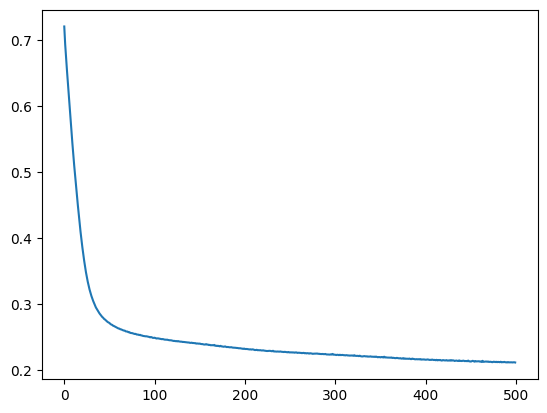

In [27]:
# ==================== Mini-Batch Gradient Descent ====================
print("\nTraining with Mini-Batch Gradient Descent (MBGD):")
model_mbgd = create_model()  # Create the model
model_mbgd.compile(loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model

start_mbgd = time.time()
# Train using MBGD: Batch size of 32
history_mbgd = model_mbgd.fit(X_scaled, y, epochs=500, batch_size=32, validation_split=0.2, verbose=0)
time_mbgd = time.time() - start_mbgd  # Record time taken

print(f"Time taken for MBGD: {time_mbgd:.2f} seconds")
plot_loss(history_mbgd, label='MBGD')  # Plot loss curve for MBGD

In [38]:
# ==================== Conclusion ====================
# Print the conclusion comparing the methods
print("\nConclusion:")
print(f"- BGD took {time_bgd:.2f} seconds. Loss curve is smooth, but it is computationally expensive.")
print(f"- SGD took {time_sgd:.2f} seconds. Noisy updates, but faster updates per epoch.")
print(f"- MBGD took {time_mbgd:.2f} seconds. Balanced approach with faster convergence than BGD and less noisy than SGD.")


Conclusion:
- BGD took 34.72 seconds. Loss curve is smooth, but it is computationally expensive.
- SGD took 346.44 seconds. Noisy updates, but faster updates per epoch.
- MBGD took 57.38 seconds. Balanced approach with faster convergence than BGD and less noisy than SGD.
